In [21]:
#!/usr/bin/python

# Import required modules
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.style as cosmostyle
import cosmoplot.utils as cosmoutils

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle

/home/helfrech/ENVIRONMENTS/ZEOLITES/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


In [22]:
# Custom datatype for loading histograms
dt = np.dtype({'names': ['bin_edges', 'dx', 'probability_density'], 
               'formats': ['f8', 'f8', 'f8']})

In [23]:
# Load SOAP cutoffs
with open('../../Processed_Data/soap_hyperparameters.json', 'r') as f:
    soap_hyperparameters = json.load(f)
    
cutoffs = soap_hyperparameters['interaction_cutoff']

In [24]:
# Plot types
plot_types = ['histogram']

# Data types
grouping = ['structures', 'environments']

# Functions

In [25]:
def make_histogram(dist_data, min_dist_data, cutoff, 
                   plot_type='histogram', label=None, output='./histogram.pdf'):
    """
        Make histograms of distances and minimum distances
        
        ---Arguments---
        dist_data: data to plot on the distance histogram as a dictonary
            with the key as the label and the data as a dictionary
            (bin_edges, dx, probability density)
        min_dist_data: data to plot on the minimum distance histogram
            as a dictonary with the key as the label and the data as a dictionary
            (bin_edges, dx, probability density)
        cutoff: cutoff label for the histogram
        plot_type: plot a histogram ('histogram') or KDE ('kde')
        label: optional label for the plot
        output: output for saved figure
        
        ---Returns---
        fig: figure object for tweaking/saving
        axes: tuple of axes (distance, min_distance) for tweaking/saving
    """
    
    # Initialize figure
    fig = plt.figure(figsize=(3.54, 3.54))
    axs_min_dist = fig.add_subplot(2, 1, 2)
    axs_dist = fig.add_subplot(2, 1, 1, sharex=axs_min_dist)

    # Set ylabel
    for i in (axs_dist, axs_min_dist):
        i.set_ylabel('Prob. Density')
    
    # Unset top xticklabels
    axs_dist.tick_params(axis='x', which='both', labelbottom=False)

    # Set scales
    axs_min_dist.set_xlabel('Distance')
    axs_min_dist.set_xscale('log')
    axs_min_dist.set_yscale('log')
    axs_dist.set_xscale('log')
    axs_dist.set_yscale('log')
    
    # Plot histograms
    for key, value in dist_data.items():
        
        # Load data
        bin_edges = value['bin_edges']
        dx = value['dx']
        probability_density = value['probability_density']
        
        # Plot bar
        if plot_type == 'histogram':
            axs_dist.bar(bin_edges, probability_density, width=dx, align='edge',
                         label=key, alpha=0.5, linewidth=0.5)
        
        # Plot KDE
        elif plot_type == 'kde':
            axs_dist.plot(bin_edges, probability_density, label=key)
            #axs_dist.fill_between(bin_edges, 0.0, probability_density, alpha=0.2)

    
    # Plot minimum distance histograms
    for key, value in min_dist_data.items():
        
        # Load data
        bin_edges = value['bin_edges']
        dx = value['dx']
        probability_density = value['probability_density']
        
        # Plot bar
        if plot_type == 'histogram':
            axs_min_dist.bar(bin_edges, probability_density, width=dx, align='edge',
                             label=key, alpha=0.5)
            
        # Plot KDE
        elif plot_type == 'kde':
            axs_min_dist.plot(bin_edges, probability_density, label=key)
            #axs_min_dist.fill_between(bin_edges, 0.0, probability_density, alpha=0.2)

        
    # Plot labels
    text_pos = (1.05, 0.00)
    text_params = dict(horizontalalignment='left', verticalalignment='bottom',
                       fontsize='medium')
        
    text_label = f'{cutoff} \u00c5\nDistance'
    text_label_min = f'{cutoff} \u00c5\nMin. Distance'
    
    if label is not None:
        text_label += f'\n{label}'
        text_label_min += f'\n{label}'
        
    axs_dist.text(*text_pos, text_label, 
                  **text_params, 
                  transform=axs_dist.transAxes)
    
    axs_min_dist.text(*text_pos, text_label_min, 
                      **text_params, 
                      transform=axs_min_dist.transAxes)
      
    # Legend
    legend_params = dict(frameon=False, loc='upper left', bbox_to_anchor=(1.0, 1.05))
    
    axs_dist.legend(**legend_params)
    axs_min_dist.legend(**legend_params)
    
    fig.subplots_adjust(hspace=0.1)
    
    fig.savefig(output, bbox_inches='tight')
    outputpng = os.path.splitext(output)[0]
    fig.savefig(outputpng+'.png', bbox_inches='tight')

    return fig, (axs_dist, axs_min_dist)

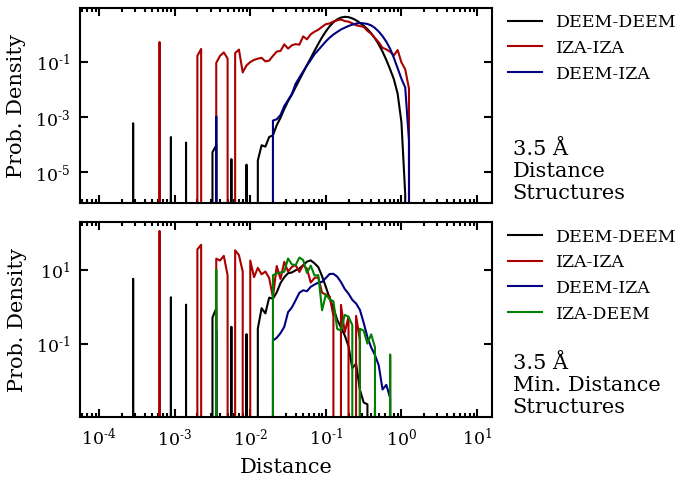

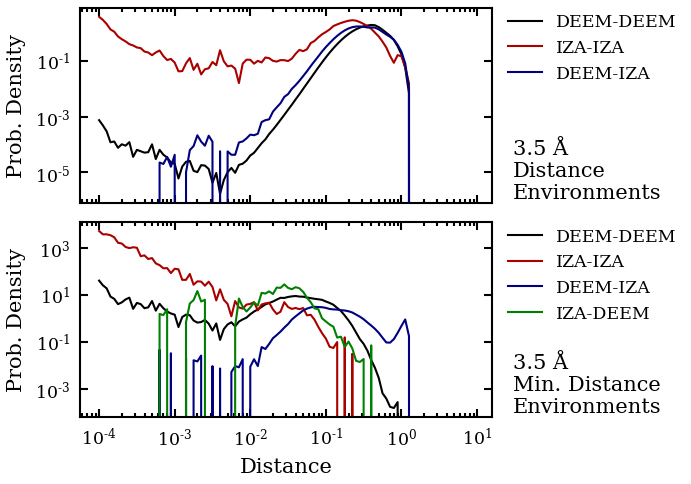

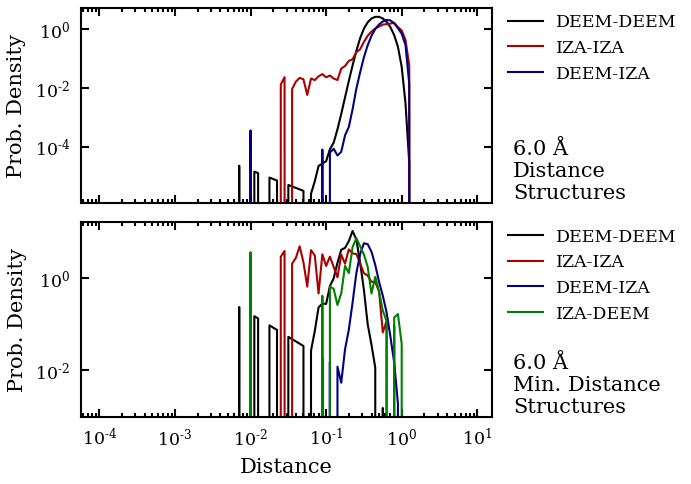

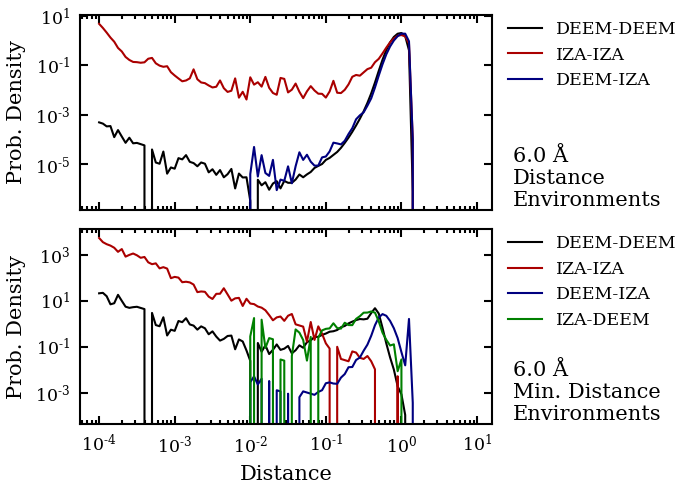

In [26]:
for cutoff in cutoffs:
    
    # Directory containing data
    data_dir = f'../../Processed_Data/Histograms/{cutoff}'
    
    for plot_type in plot_types:
        for group in grouping:
        
            # Load data
            deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_'
                                   f'{plot_type}_{group}.dat', dtype=dt)
            iza_iza = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_'
                                 f'{plot_type}_{group}.dat', dtype=dt)
            iza_deem = np.loadtxt(f'{data_dir}/IZA_226-DEEM_10k_'
                                  f'{plot_type}_{group}.dat', dtype=dt)

            deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_'
                                       f'{plot_type}_{group}.dat', dtype=dt)
            iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_min_'
                                     f'{plot_type}_{group}.dat', dtype=dt)
            deem_iza_min = np.loadtxt(f'{data_dir}/DEEM_10k-IZA_226_min_'
                                      f'{plot_type}_{group}.dat', dtype=dt)
            iza_deem_min = np.loadtxt(f'{data_dir}/IZA_226-DEEM_10k_min_'
                                      f'{plot_type}_{group}.dat', dtype=dt)

            # Collect data
            dist_data = dict([('DEEM-DEEM', deem_deem),
                              ('IZA-IZA', iza_iza),
                              ('DEEM-IZA', iza_deem)])

            min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
                                  ('IZA-IZA', iza_iza_min),
                                  ('DEEM-IZA', deem_iza_min),
                                  ('IZA-DEEM', iza_deem_min)])

            # Plot
            make_histogram(dist_data, min_dist_data, cutoff, 
                           plot_type='kde', label=group.capitalize(),
                           output=f'../../Results/{cutoff}/IZA_226-DEEM_10k_'
                           f'{plot_type}_{group}.pdf')

            plt.show()

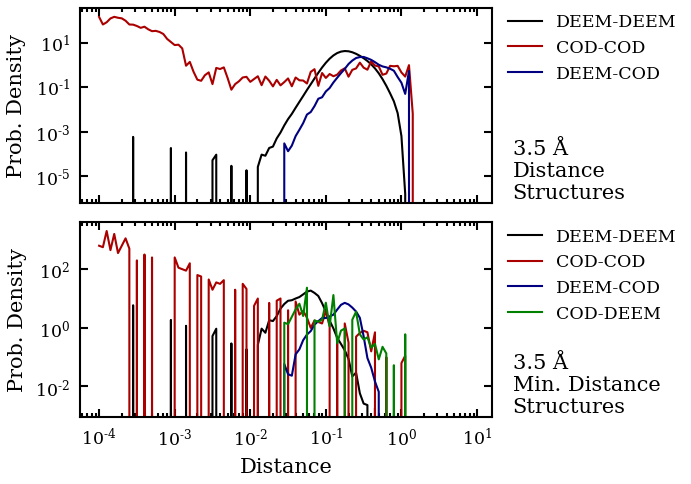

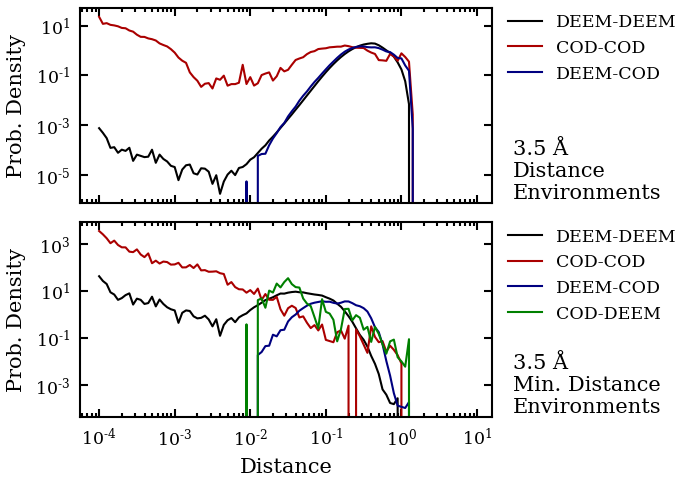

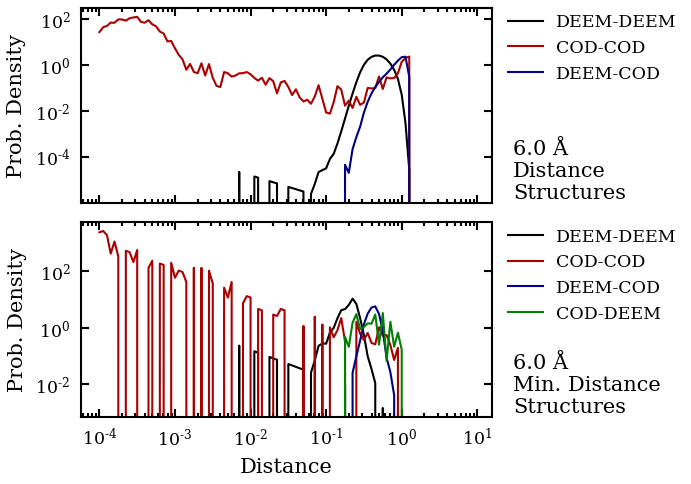

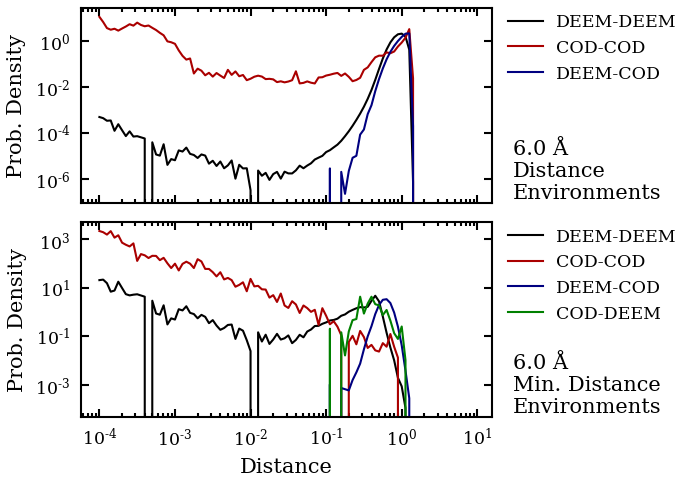

In [27]:
for cutoff in cutoffs:
    
    # Directory containing data
    data_dir = f'../../Processed_Data/Histograms/{cutoff}'
    
    for plot_type in plot_types:
        for group in grouping:
    
            # Load data
            deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_'
                                   f'{plot_type}_{group}.dat', dtype=dt)
            cod_cod = np.loadtxt(f'{data_dir}/COD_196-COD_196_'
                                 f'{plot_type}_{group}.dat', dtype=dt)
            cod_deem = np.loadtxt(f'{data_dir}/COD_196-DEEM_10k_'
                                  f'{plot_type}_{group}.dat', dtype=dt)

            deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_'
                                       f'{plot_type}_{group}.dat', dtype=dt)
            cod_cod_min = np.loadtxt(f'{data_dir}/COD_196-COD_196_min_'
                                     f'{plot_type}_{group}.dat', dtype=dt)
            deem_cod_min = np.loadtxt(f'{data_dir}/DEEM_10k-COD_196_min_'
                                      f'{plot_type}_{group}.dat', dtype=dt)
            cod_deem_min = np.loadtxt(f'{data_dir}/COD_196-DEEM_10k_min_'
                                      f'{plot_type}_{group}.dat', dtype=dt)

            # Collect data
            dist_data = dict([('DEEM-DEEM', deem_deem),
                              ('COD-COD', cod_cod),
                              ('DEEM-COD', cod_deem)])

            min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
                                  ('COD-COD', cod_cod_min),
                                  ('DEEM-COD', deem_cod_min),
                                  ('COD-DEEM', cod_deem_min)])

            # Plot
            make_histogram(dist_data, min_dist_data, cutoff, 
                           plot_type='kde', label=group.capitalize(),
                           output=f'../../Results/{cutoff}/COD_196-DEEM_10k_'
                           f'{plot_type}_{group}.pdf')

            plt.show()

In [28]:
# Load IZA cantons
iza_cantons = np.loadtxt('../../Raw_Data/GULP/IZA_226/cantons.txt', 
                         dtype={'names': ['structures', 'cantons'], 'formats': ['U3', 'i8']})
canton_labels = np.unique(iza_cantons['cantons'])
print(canton_labels)

[1 2 3 4]


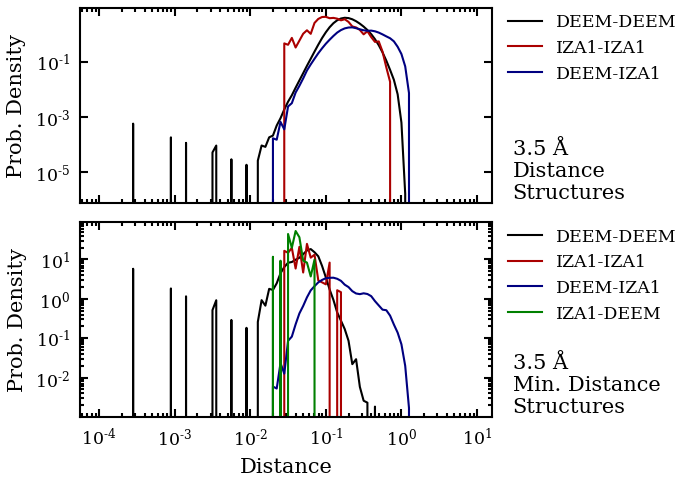

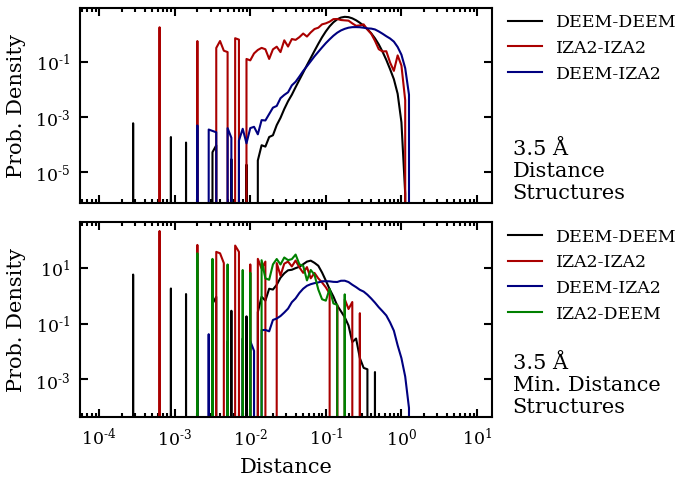

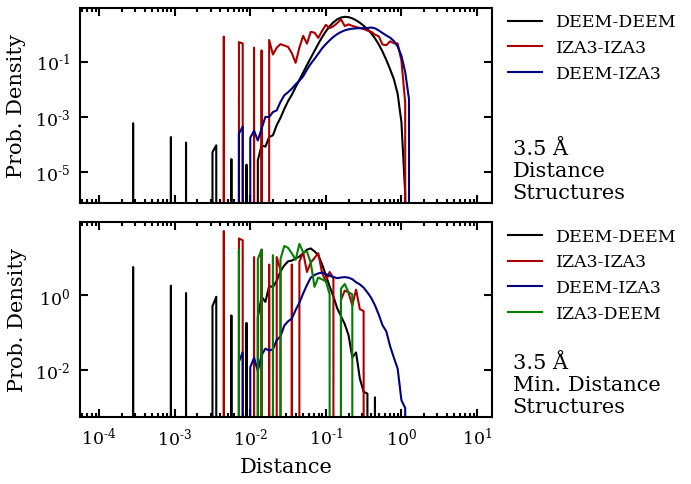

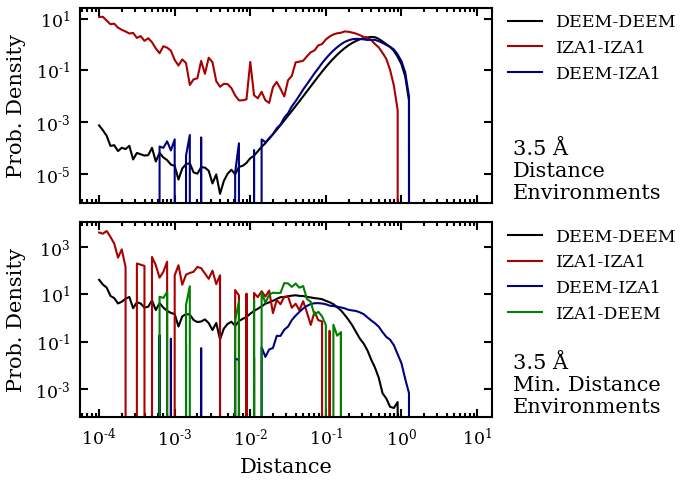

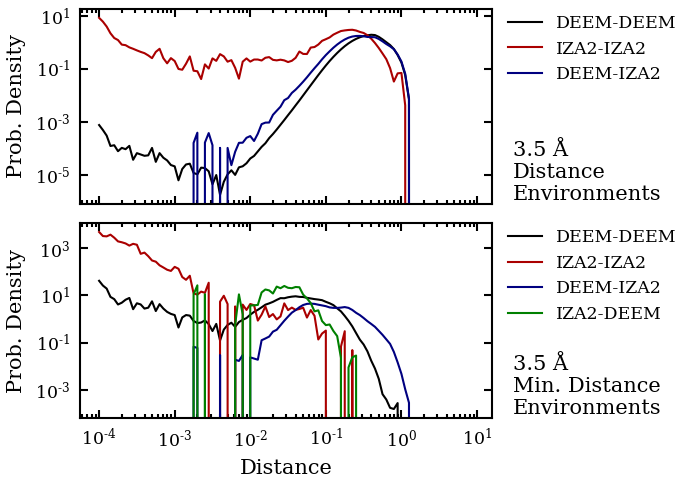

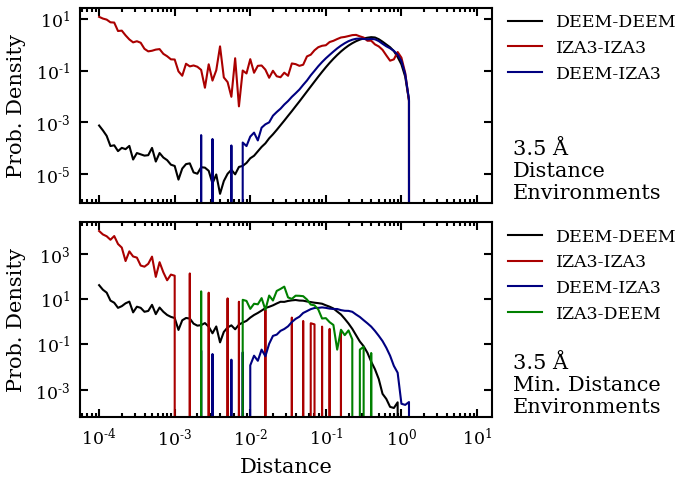

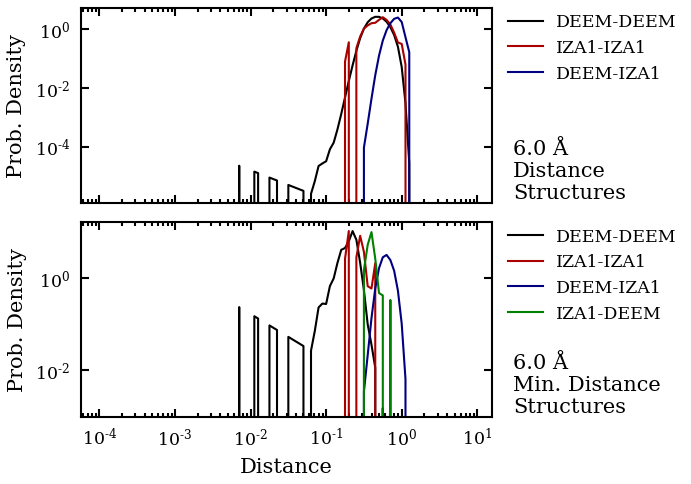

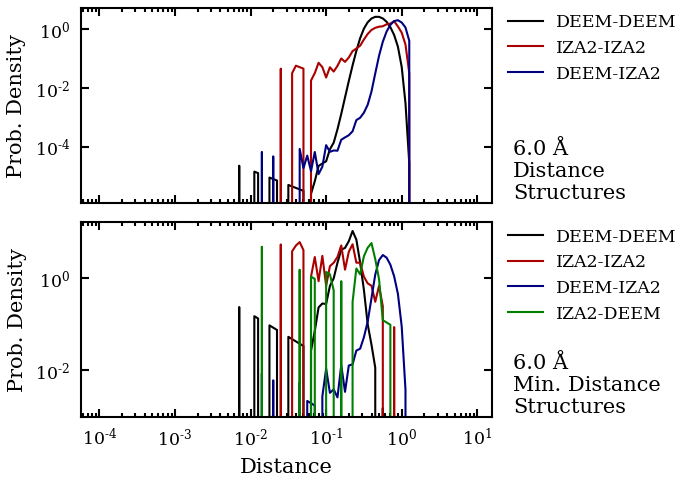

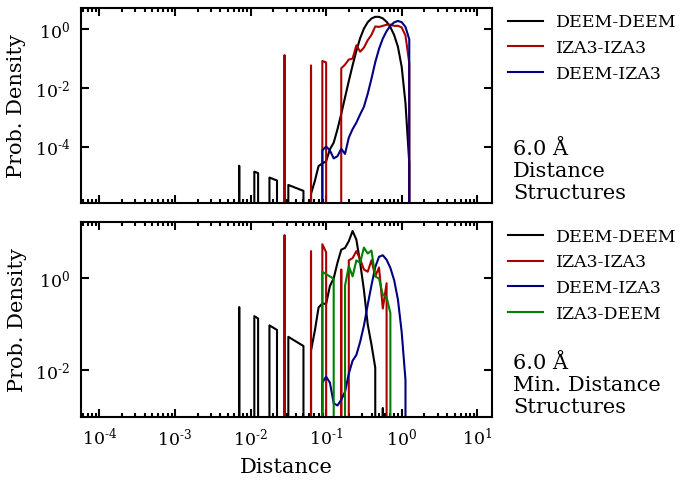

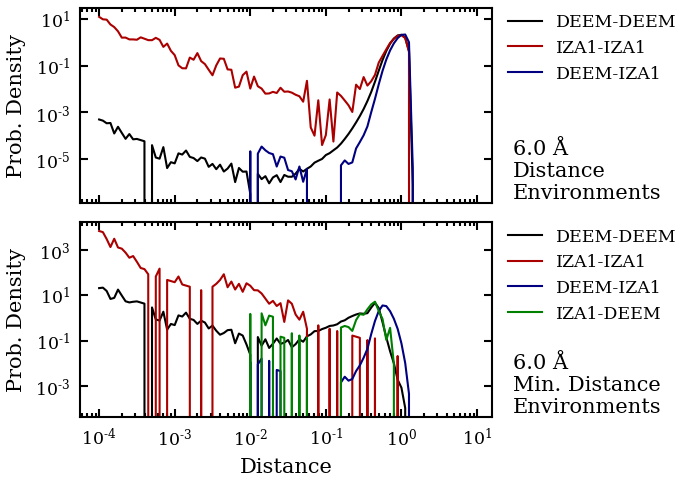

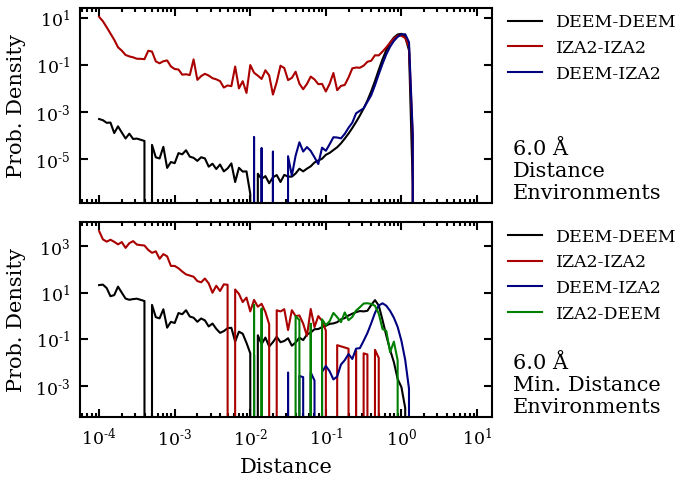

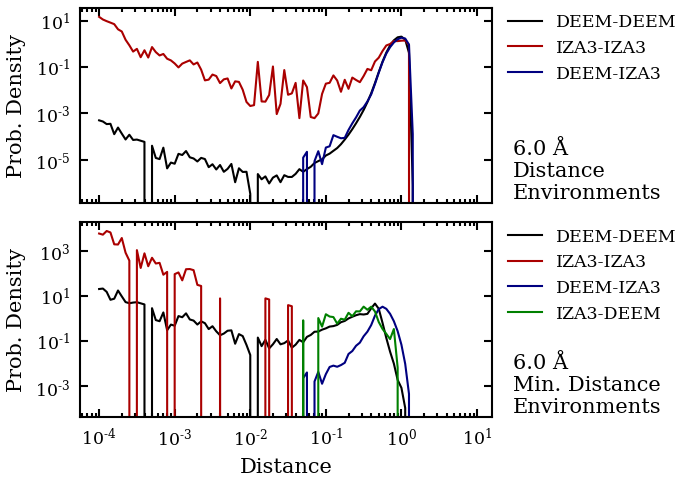

In [29]:
for cutoff in cutoffs:
    
    # Directory containing data
    data_dir = f'../../Processed_Data/Histograms/{cutoff}'
    
    for plot_type in plot_types:
        for group in grouping:

            # Load DEEM only data
            deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_'
                                   f'{plot_type}_{group}.dat', dtype=dt)
            deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_'
                                       f'{plot_type}_{group}.dat', dtype=dt)

            # Skip canton 4 (RWY) since self-{plot_type}_{data_type} is empty
            cantons = np.delete(canton_labels, 3)
            for canton in cantons:

                # Load IZA data
                iza_iza = np.loadtxt(f'{data_dir}/IZA_226_{canton}-IZA_226_{canton}_'
                                     f'{plot_type}_{group}.dat', dtype=dt)
                iza_deem = np.loadtxt(f'{data_dir}/IZA_226_{canton}-DEEM_10k_'
                                      f'{plot_type}_{group}.dat', dtype=dt)

                iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226_{canton}-IZA_226_{canton}'
                                         f'_min_{plot_type}_{group}.dat', dtype=dt)
                deem_iza_min = np.loadtxt(f'{data_dir}/DEEM_10k-IZA_226_{canton}_min_'
                                          f'{plot_type}_{group}.dat', dtype=dt)
                iza_deem_min = np.loadtxt(f'{data_dir}/IZA_226_{canton}-DEEM_10k_min_'
                                          f'{plot_type}_{group}.dat', dtype=dt)

                # Collect data
                dist_data = dict([('DEEM-DEEM', deem_deem),
                                  (f'IZA{canton}-IZA{canton}', iza_iza),
                                  (f'DEEM-IZA{canton}', iza_deem)])

                min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
                                      (f'IZA{canton}-IZA{canton}', iza_iza_min),
                                      (f'DEEM-IZA{canton}', deem_iza_min),
                                      (f'IZA{canton}-DEEM', iza_deem_min)])

                # Plot
                make_histogram(dist_data, min_dist_data, cutoff, 
                               plot_type='kde', label=group.capitalize(),
                               output=f'../../Results/{cutoff}/IZA_226_{canton}-DEEM_10k_'
                               f'{plot_type}_{group}.pdf')

                plt.show()

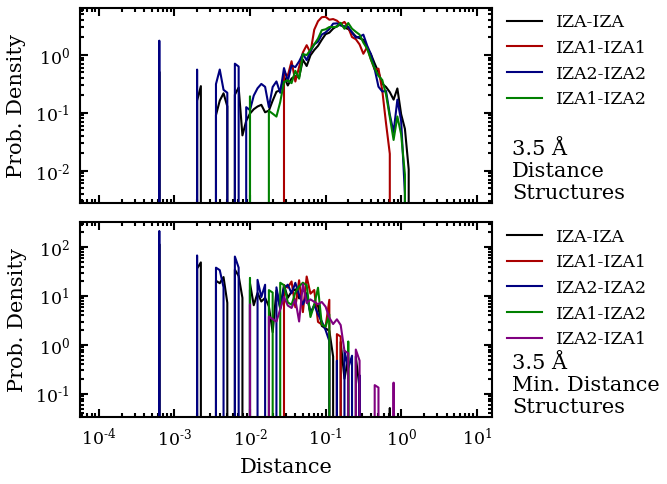

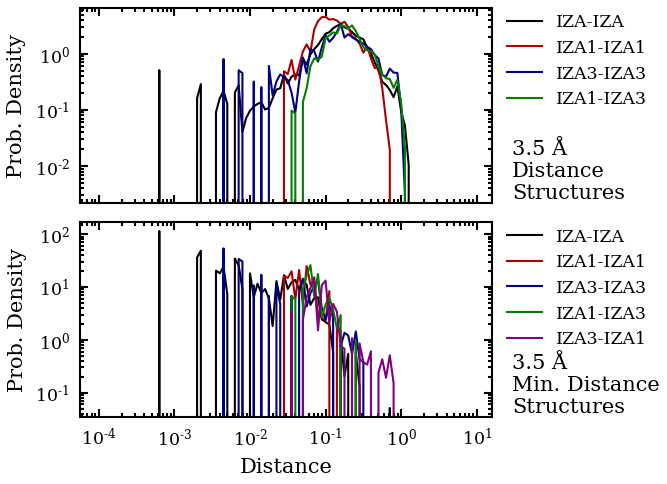

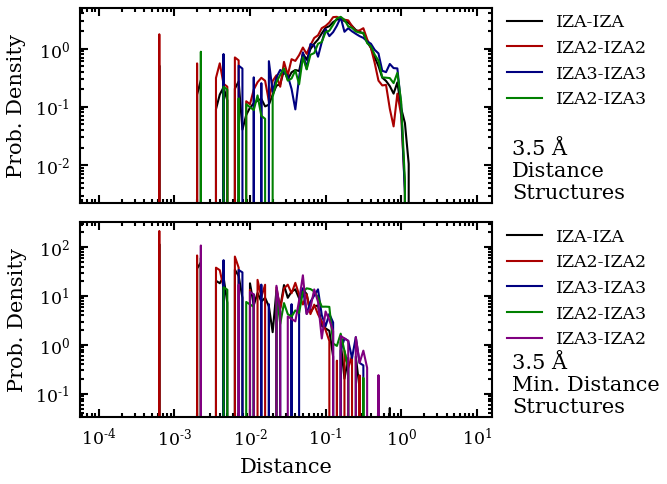

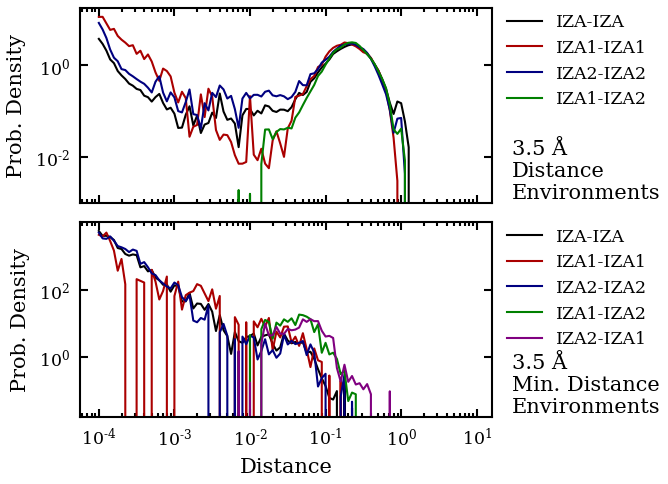

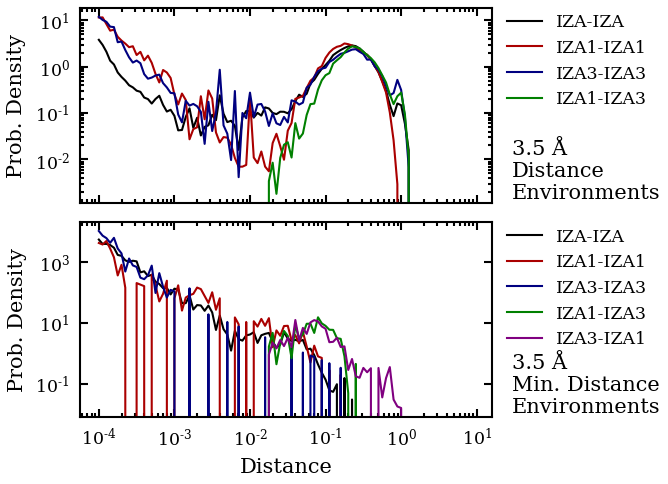

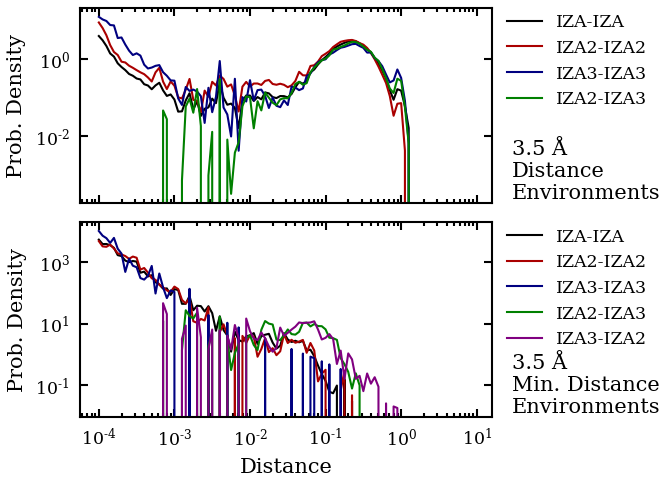

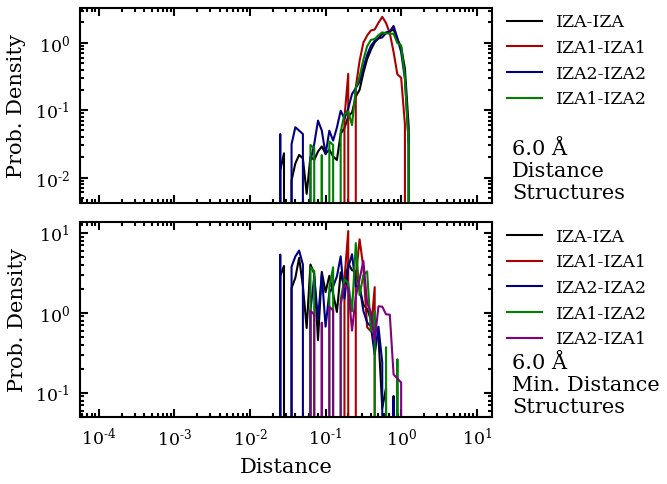

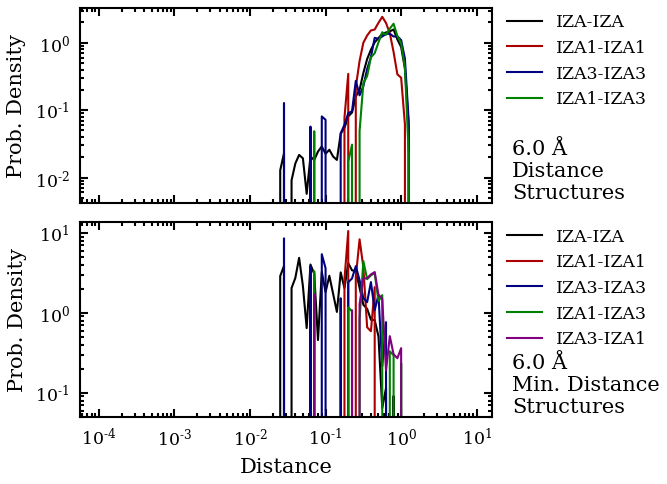

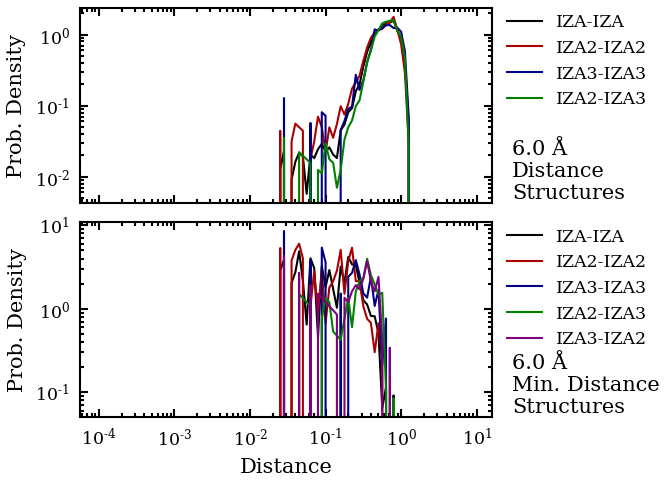

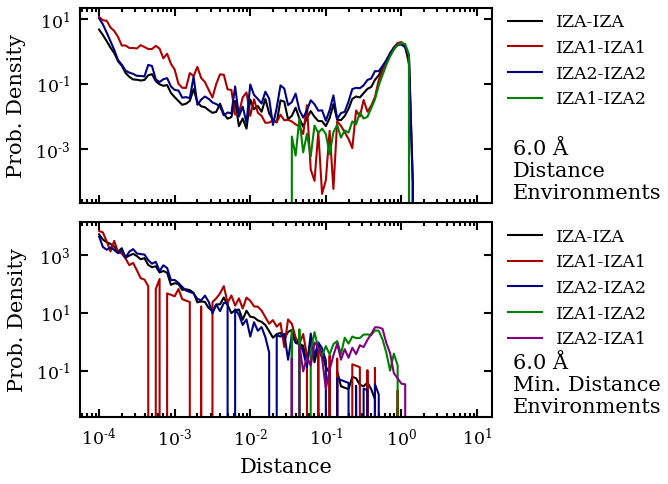

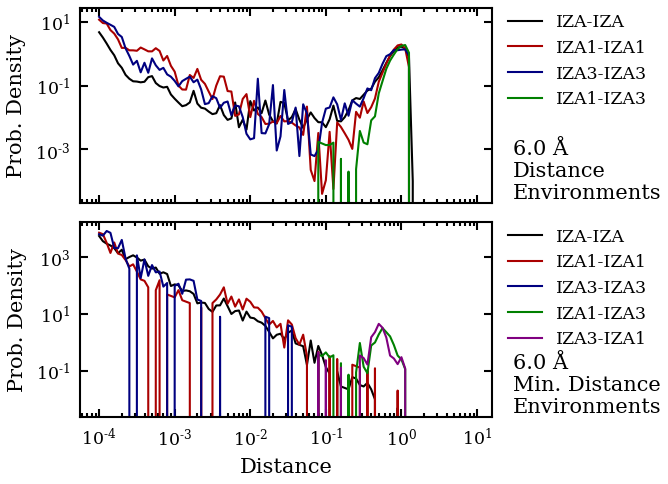

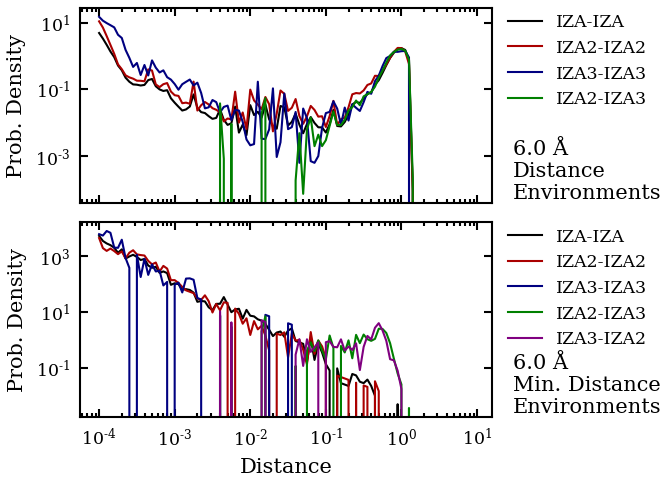

In [30]:
 for cutoff in cutoffs:
    
    # Directory containing data
    data_dir = f'../../Processed_Data/Histograms/{cutoff}'
    
    for plot_type in plot_types:
        for group in grouping:
    
            # Load IZA data (all cantons)
            iza_iza = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_'
                                 f'{plot_type}_{group}.dat', dtype=dt)
            iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_min_'
                                     f'{plot_type}_{group}.dat', dtype=dt)

            # Skip canton 4 (RWY) since self-{plot_type}_{data_type} is empty
            cantons = np.delete(canton_labels, 3)
            for cdx, canton_A in enumerate(cantons):

                # Load data from first canton
                iza_A_iza_A = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_A}_'
                                         f'{plot_type}_{group}.dat', dtype=dt)
                iza_A_iza_A_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_A}_min_'
                                             f'{plot_type}_{group}.dat', dtype=dt)

                for canton_B in cantons[cdx:]:
                    if canton_A == canton_B:
                        continue

                    # Load data from second canton
                    iza_B_iza_B = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_B}_'
                                             f'{plot_type}_{group}.dat', dtype=dt)
                    iza_B_iza_B_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_B}_min_'
                                                 f'{plot_type}_{group}.dat', dtype=dt)

                    iza_A_iza_B = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_B}_'
                                             f'{plot_type}_{group}.dat', dtype=dt)

                    iza_A_iza_B_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_B}_'
                                                 f'min_{plot_type}_{group}.dat', dtype=dt)
                    iza_B_iza_A_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_A}_min_'
                                                 f'{plot_type}_{group}.dat', dtype=dt)

                    # Collect data
                    dist_data = dict([('IZA-IZA', iza_iza),
                                      (f'IZA{canton_A}-IZA{canton_A}', iza_A_iza_A),
                                      (f'IZA{canton_B}-IZA{canton_B}', iza_B_iza_B),
                                      (f'IZA{canton_A}-IZA{canton_B}', iza_A_iza_B)])

                    min_dist_data = dict([('IZA-IZA', iza_iza_min),
                                          (f'IZA{canton_A}-IZA{canton_A}', iza_A_iza_A_min),
                                          (f'IZA{canton_B}-IZA{canton_B}', iza_B_iza_B_min),
                                          (f'IZA{canton_A}-IZA{canton_B}', iza_A_iza_B_min),
                                          (f'IZA{canton_B}-IZA{canton_A}', iza_B_iza_A_min)])

                    # Plot
                    make_histogram(dist_data, min_dist_data, cutoff, 
                                   plot_type='kde', label=group.capitalize(),
                                   output=f'../../Results/{cutoff}/IZA_226_{canton_A}-IZA_226_{canton_B}_'
                                   f'{plot_type}_{group}.pdf')

                    plt.show()